In [1]:
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle


In [2]:
# 读取数据文件
df = pd.read_csv('./boston.csv', header=0)
#print(df.describe())

# 获取df值
df = df.values
# 转成numpy处理
df = np.array(df) 

# version 2 增加这两行，归一化处理 即数据预处理
# 对0-11列即x向量进行归一化操作，不改变Y向量。
for i in range(12):
    df[:,i] = (df[:,i] - df[:].min())/(df[:].max() - df[:].min())


# x_data 为所有行，前12列的特征数据
x_data = df[:,:12]
# y_data 为所有行第13列的特征数据
y_data = df[:,12]

#定义特征数据和标签数据的站位符.因为不知道多少行所以第一项填None
# shape中None表示行的数量未知，在实际训练时，决定一次代入多少行样本，
# 从一个样本的随机SDG到批量SDG都可以
x = tf.placeholder(tf.float32, [None, 12], name = 'X')
y = tf.placeholder(tf.float32, [None, 1], name = "Y")


In [3]:
# 定义命名空间，使得计算图更可读
with tf.name_scope("model"):
    w = tf.Variable(tf.random_normal([12, 1], stddev=0.01), name='W')
    b = tf.Variable(1.0, name='b')
    
    #叉乘用 tf.matmul。 这里会将3个列向量（xwb）中第一个x转置为行向量进行叉乘
    def model(x,w,b):
        return tf.matmul(x,w)+b
    
    # 这一段和一元回归基本一样
    pred = model(x,w,b)
    train_epochs = 50
    learing_rate = 0.01
    
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred, 2)) # 均方误差
    optimizer = tf.train.GradientDescentOptimizer(learing_rate).minimize(loss_function)


<IPython.core.display.Javascript object>


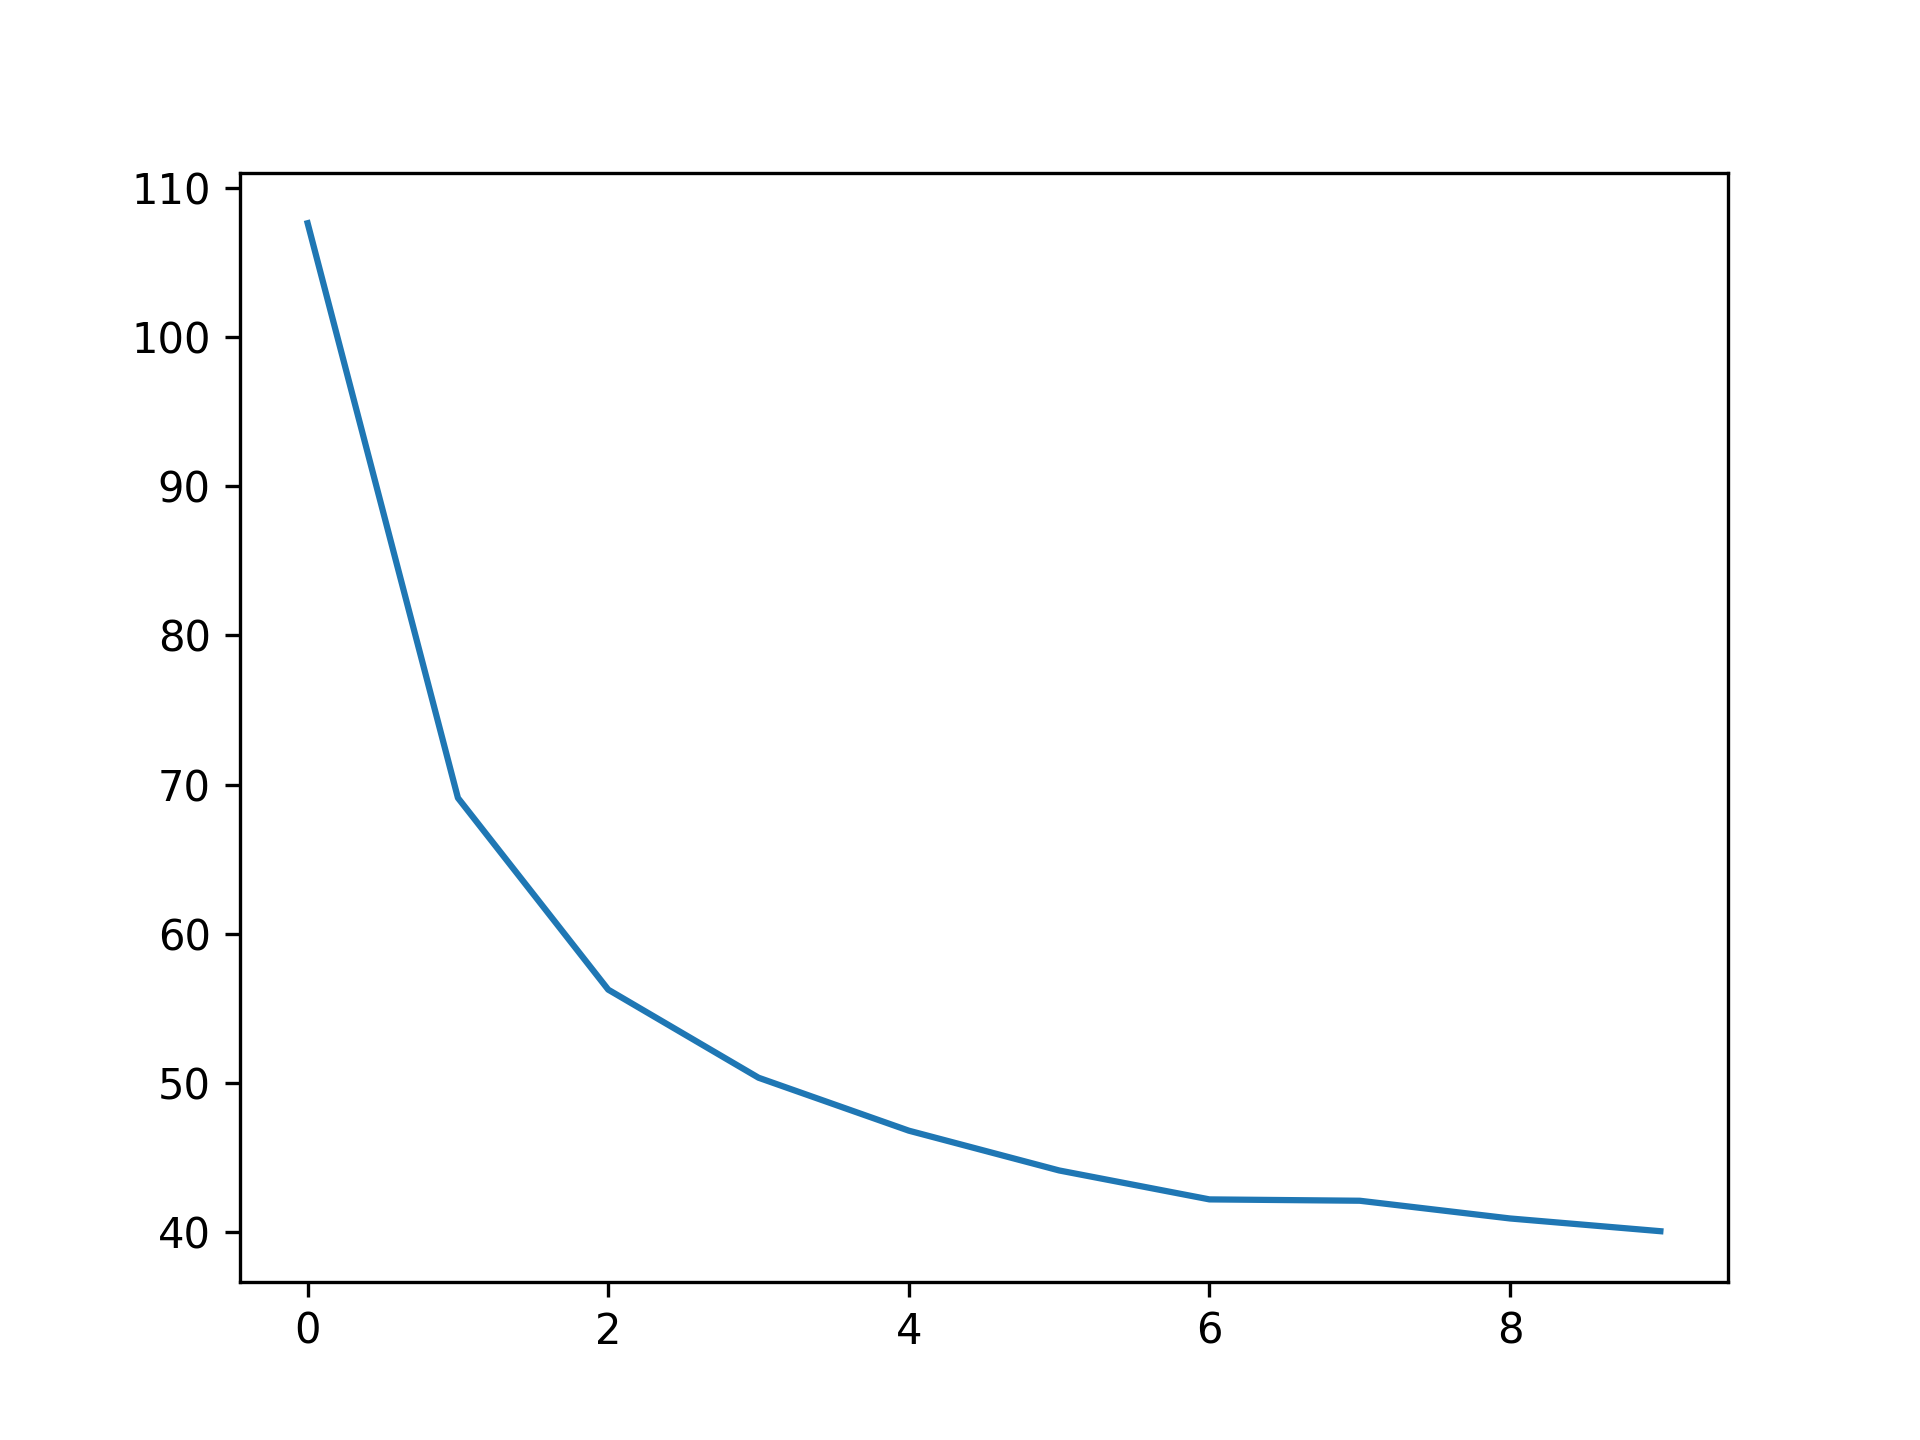

In [6]:
# 开始训练
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#version 3 增加，用于保存loss
loss_list = [] # 每轮添加一个average
loss_list2 = [] # 每次样本记录一个loss

for epoch in range(10):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)
        
        _, loss = sess.run([optimizer, loss_function], feed_dict={
            x:xs, y:ys
        })
        
        loss_sum = loss_sum + loss
        loss_list2.append(loss)
        
    # 打乱样本集
    x_data, y_data = shuffle(x_data, y_data)

    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    loss_average = loss_sum/len(y_data)
        
    #print("epoch=", epoch+1, " loss=",loss_average, " b=", b0temp, " w=", w0temp)
    
    # version 3增加,每轮记录一次评价loss
    loss_list.append(loss_average)
# version 3 增加，可视化loss
plt.plot(loss_list)
#plt.plot(loss_list2)